# Imported core libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set a consistent plotting style across the project
plt.style.use("ggplot")

# Display settings for better readability
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)


In [2]:
# Loaded raw datasets from the data/raw directory
# These files were assumed to be downloaded manually from Kaggle

sales = pd.read_csv("../data/raw/sales_train_validation.csv")
calendar = pd.read_csv("../data/raw/calendar.csv")
prices = pd.read_csv("../data/raw/sell_prices.csv")

# Checked dataset shapes to understand overall scale
sales.shape, calendar.shape, prices.shape


((30490, 1919), (1969, 14), (6841121, 4))

## Initial Data Inspection

Before transforming the data, the structure of each dataset
was inspected to understand:

- Identifier columns
- Time representation
- Target variable location
- Join keys across files


In [3]:
# Displayed the first few rows of the sales dataset
sales.head()


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [4]:
# Inspected column structure and data types
sales.info()


<class 'pandas.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), str(6)
memory usage: 448.2 MB


Observations:

- Each row represented a unique SKU–store combination.
- Daily demand values were stored in wide format (d_1, d_2, …).
- The dataset contained thousands of individual time series.
- Demand values were non-negative integers.


In [5]:
# Displayed calendar structure
calendar.head()


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [6]:
calendar.info()


<class 'pandas.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   date          1969 non-null   str  
 1   wm_yr_wk      1969 non-null   int64
 2   weekday       1969 non-null   str  
 3   wday          1969 non-null   int64
 4   month         1969 non-null   int64
 5   year          1969 non-null   int64
 6   d             1969 non-null   str  
 7   event_name_1  162 non-null    str  
 8   event_type_1  162 non-null    str  
 9   event_name_2  5 non-null      str  
 10  event_type_2  5 non-null      str  
 11  snap_CA       1969 non-null   int64
 12  snap_TX       1969 non-null   int64
 13  snap_WI       1969 non-null   int64
dtypes: int64(7), str(7)
memory usage: 263.1 KB


Observations:

- Calendar mapped day identifiers to real dates.
- Multiple event-related columns were available.
- SNAP indicators varied by state.
- Weekly index (wm_yr_wk) was present for price joins.


In [7]:
# Displayed price data
prices.head()


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [8]:
prices.info()


<class 'pandas.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    str    
 1   item_id     str    
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), str(2)
memory usage: 318.1 MB


Observations:

- Prices were reported at weekly granularity.
- Prices varied by SKU and store.
- Missing prices indicated periods before product availability.


## Converting Sales Data to Long Format

The sales dataset was originally provided in wide format.
For time-series modeling and feature engineering,
the data was converted to long format.


In [9]:
# Converted sales data from wide to long format
sales_long = sales.melt(
    id_vars=["id", "item_id", "dept_id", "cat_id", "store_id", "state_id"],
    var_name="day",
    value_name="demand"
)

# Verified transformation
sales_long.head()


,id,item_id,dept_id,cat_id,store_id,state_id,day,demand
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [10]:
# Checked shape after transformation
sales_long.shape


(58327370, 8)

## Merging Calendar Information

Calendar data was merged to attach real dates,
events, and weekly indices to each demand observation.


In [11]:
# Merged calendar information using day identifier
sales_long = sales_long.merge(
    calendar,
    left_on="day",
    right_on="d",
    how="left"
)

# Dropped redundant column after merge
sales_long.drop(columns=["d"], inplace=True)

# Verified merge
sales_long.head()


,id,item_id,dept_id,cat_id,store_id,state_id,day,demand,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0


## Demand Distribution Analysis

Understanding demand distribution was critical to:

- Identify sparsity
- Detect heavy tails
- Decide appropriate evaluation metrics


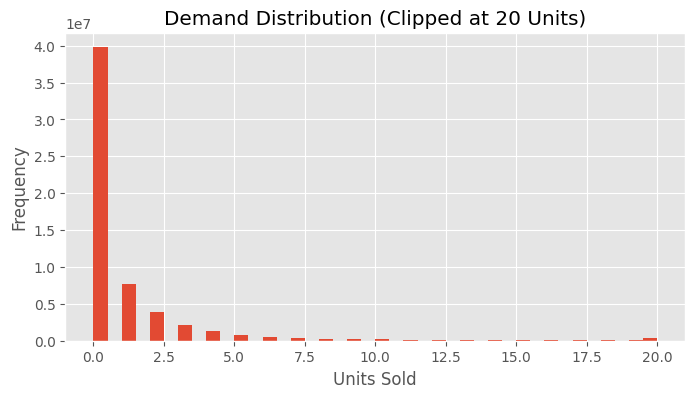

In [12]:
# Plotted clipped demand distribution to reduce skew impact
plt.figure(figsize=(8, 4))
sales_long["demand"].clip(0, 20).hist(bins=40)
plt.title("Demand Distribution (Clipped at 20 Units)")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.show()


Insights:

- Demand was highly right-skewed.
- A large fraction of observations had zero demand.
- This confirmed the need for robust metrics such as WAPE.


In [13]:
# Calculated proportion of zero-demand days
zero_demand_ratio = (sales_long["demand"] == 0).mean()
zero_demand_ratio


np.float64(0.6819627560783214)

A significant proportion of days had zero demand.
This reinforced the decision to use:

- Global models
- Aggregation-aware evaluation
- Probabilistic forecasts


## Temporal Demand Trends

To understand global patterns, demand was aggregated
across all SKUs and stores.


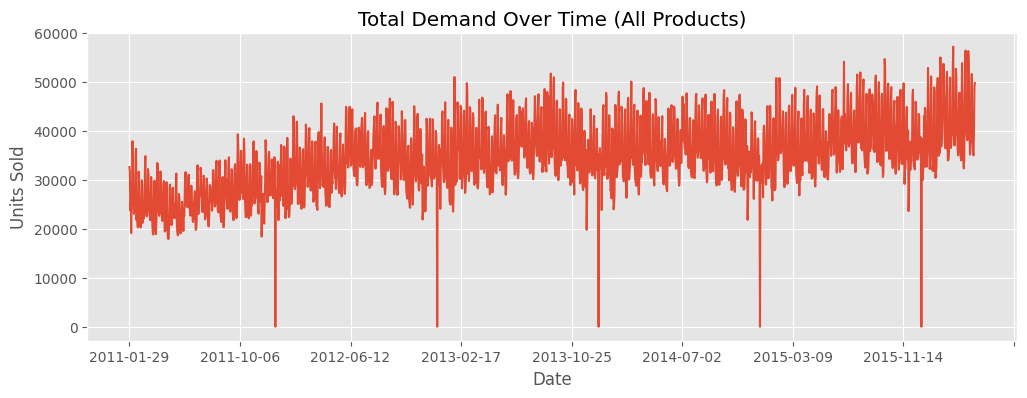

In [14]:
# Aggregated total demand by date
total_demand = sales_long.groupby("date")["demand"].sum()

plt.figure(figsize=(12, 4))
total_demand.plot()
plt.title("Total Demand Over Time (All Products)")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()


Insights:

- Clear seasonality patterns were present.
- Demand increased during holiday periods.
- Long-term trends suggested non-stationarity.


## Category-Level Demand Patterns

Demand behavior varied significantly across product categories.
Understanding this heterogeneity was important before modeling.


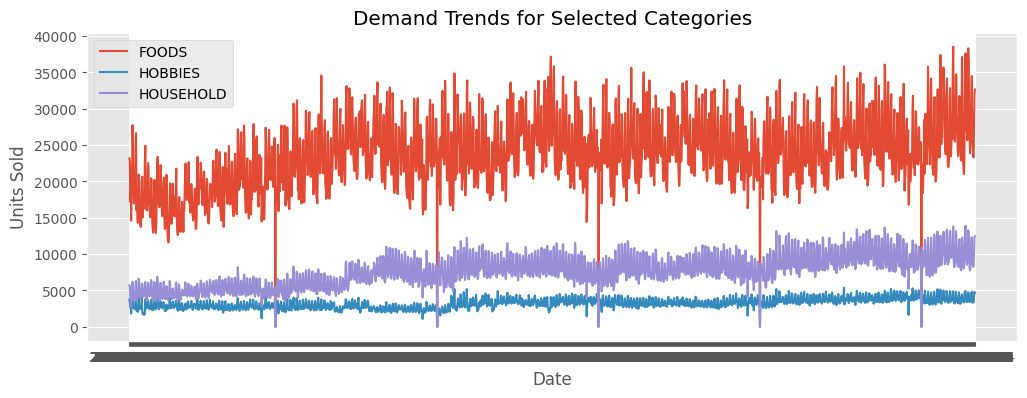

In [16]:
# Aggregated demand by category and date
category_demand = (
    sales_long
    .groupby(["cat_id", "date"])["demand"]
    .sum()
    .reset_index()
)

# Plotted demand for a few categories
plt.figure(figsize=(12, 4))

for cat in category_demand["cat_id"].unique()[:3]:
    subset = category_demand[category_demand["cat_id"] == cat]
    plt.plot(subset["date"], subset["demand"], label=cat)

plt.legend()
plt.title("Demand Trends for Selected Categories")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()


## Summary of Key Findings

- The dataset contained thousands of sparse time series.
- Demand exhibited strong seasonality and event effects.
- Zero-demand days were common at the SKU level.
- Aggregated demand was smoother and more predictable.
- Hierarchical modeling was necessary to preserve structure.

These findings directly informed the modeling choices
in subsequent notebooks.
